In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn
import pickle

df = pd.read_csv("linear_regression_dataset_with_module_technology.csv")

In [7]:
df = df[['pixel_count', 'mounting_configuration', 'technology_type', 'power']]
# Only include mono-Si and multi-Si modules
df = df[(df['technology_type']==1) | (df['technology_type']==2)]
inputValues = df.values[:, 0:3] 
outputValue = df.values[:, 3] 

# Create 3 folds
kf = KFold(n_splits=3, random_state=None, shuffle=True)

score = sklearn.model_selection.cross_validate(sklearn.linear_model.LinearRegression(), inputValues, outputValue, scoring=["r2", "neg_mean_absolute_error", "neg_mean_squared_error"], cv=kf)
print(score)


{'fit_time': array([0.00997496, 0.00099802, 0.00099492]), 'score_time': array([0.0019927 , 0.00099635, 0.0009985 ]), 'test_r2': array([0.84993996, 0.70015621, 0.78593788]), 'test_neg_mean_absolute_error': array([ -97.95064104, -116.57155454,  -91.04332994]), 'test_neg_mean_squared_error': array([-27476.62345766, -36524.98716052, -17594.49911508])}


In [8]:
# Get the associated p-values for each variable in the regression model

import statsmodels.api as sm

X = df[['pixel_count', 'mounting_configuration', 'technology_type']]
est = sm.OLS(df['power'], X)
est2 = est.fit()
print(est2.summary())

print(inputValues)

                                 OLS Regression Results                                
Dep. Variable:                  power   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              792.5
Date:                Thu, 11 Aug 2022   Prob (F-statistic):                   2.36e-141
Time:                        08:26:12   Log-Likelihood:                         -1948.2
No. Observations:                 300   AIC:                                      3902.
Df Residuals:                     297   BIC:                                      3914.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

Feature: 0, Score: 7.19472
Feature: 1, Score: 69.58461
Feature: 2, Score: 97.10833


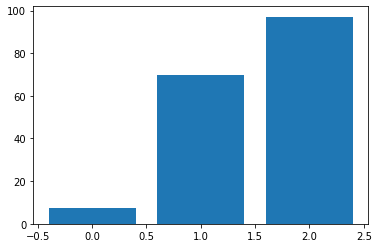

In [9]:
# Feature importance
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=300, n_features=3, n_informative=3, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

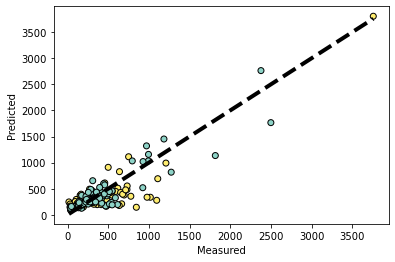

300
predicted type: <class 'numpy.ndarray'>
output type: <class 'numpy.ndarray'>


In [11]:
predicted = sklearn.model_selection.cross_val_predict(sklearn.linear_model.LinearRegression(), inputValues, outputValue, cv=kf)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(outputValue, predicted, edgecolors=(0, 0, 0), c=df.technology_type, cmap='Set3')
ax.plot([outputValue.min(), outputValue.max()], [outputValue.min(), outputValue.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print(len(predicted))
with open('./panel_segmentation/models/cross_validation_prediction_model', 'wb') as files:
    pickle.dump(predicted, files)

In [55]:
ordinaryLeastSquaresModel = sklearn.linear_model.LinearRegression()
ordinaryLeastSquaresModel.fit(inputValues, outputValue)
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None)

LinearRegression(fit_intercept=False)

In [56]:
coef = ordinaryLeastSquaresModel.coef_
#intercept = ordinaryLeastSquaresModel.intercept_
print('coef= ', coef)
#print('intercept= ', intercept)

coef=  [1.95733679e-02 2.36353582e+01 3.37310388e+01]


In [36]:
predictedPower = pd.DataFrame(ordinaryLeastSquaresModel.predict(inputValues), columns=['Predicted Power']) 
actualPower = pd.DataFrame(outputValue, columns=['Actual Power'])
actualPower = actualPower.reset_index(drop=True)
df_actual_vs_predicted = pd.concat([actualPower,predictedPower],axis =1)
df_actual_vs_predicted.to_csv("actual_vs_predicted.csv", index=False)

In [16]:
with open('./panel_segmentation/models/power_estimation_model', 'wb') as files:
    pickle.dump(ordinaryLeastSquaresModel, files)

In [59]:
with open('./panel_segmentation/models/power_estimation_model', 'rb') as f:
    lr = pickle.load(f)
    
# Estimate power output for rooftop mount, multi-Si array with pixel count of 2500
lr.predict([[2500, 1, 1]])

array([113.29482047])

In [18]:
print(lr.predict([[2500, 1, 1]])[0])

113.29482046569953
